In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
## Uncomment these two lines once on each computer. 
#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

##  Loading Keith's calibration dataset and calculating missing data amount

In [4]:
Keith=pd.read_excel('Supporting_Data_1.xlsx', sheet_name='Putirka_Cali')

In [5]:
## Loading into thermobar format
Keith_in=pt.import_excel('Supporting_Data_1.xlsx', sheet_name='Putirka_Cali_Thermobar') 
Keith_input=Keith_in['my_input']
Keith_Cpx=Keith_in['Cpxs']
cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Keith_Cpx)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [6]:
## Loading into thermobar format
Petrelli=pd.read_excel('Supporting_Data_1.xlsx', sheet_name='Petrelli_Cali') 

In [7]:
## Loading into thermobar format
Petrelli_in=pt.import_excel('Supporting_Data_1.xlsx', sheet_name='Petrelli_Cali') 
Petrelli_input=Petrelli_in['my_input']
Petrelli_Cpx=Petrelli_in['Cpxs']
Petrelli_Liq=Petrelli_in['Liqs']

### Text about Cr

In [8]:
NoCr_Liq_Keith=Keith['Wt: Cr2O3_Liq']==0
sum(NoCr_Liq_Keith)

NoCr_Cpx_Keith=Keith['Wt: Cr2O3_Cpx']==0
sum(NoCr_Cpx_Keith)

Cr_Liq_Keith=Keith['Wt: Cr2O3_Liq']>0
sum(Cr_Liq_Keith)

Cr_Cpx_Keith=Keith['Wt: Cr2O3_Cpx']>0
sum(Cr_Cpx_Keith)

698

In [9]:
print('Prop Keith with no Liq Cr data')
print(100*sum(NoCr_Liq_Keith)/(sum(NoCr_Liq_Keith)+sum(Cr_Liq_Keith)))


Prop Keith with no Liq Cr data
58.21635012386457


In [13]:
print('Prop Keith with no Cpx Cr data')
print(100*sum(NoCr_Cpx_Keith)/(sum(NoCr_Cpx_Keith)+sum(Cr_Cpx_Keith)))


Prop Keith with no Cpx Cr data
42.36168455821635


### Text missing text about water

In [11]:
print('Keith Prop with water = 0')
print(100*sum(Keith['Wt: H2O']==0)/(sum(Keith['Wt: H2O']>0)+sum(Keith['Wt: H2O']==0)))
print(100*sum(Keith['Wt: H2O']==0)/(len(Keith)))

Keith Prop with water = 0
73.50565428109854
72.27958697378872


In [12]:
Petrelli_nan=Petrelli.fillna(0)
print('Petrelli Prop with water = 0')
print(100*sum(Petrelli_nan['H2O_Liq']==0)/(sum(Petrelli_nan['H2O_Liq']>0)+sum(Petrelli_nan['H2O_Liq']==0)))
print(100*sum(Petrelli_nan['H2O_Liq']==0)/(len(Petrelli_nan)))

Petrelli Prop with water = 0
66.23529411764706
66.23529411764706


In [13]:
print('Prop with P2O5 = 0')
print(100*sum(Keith['Wt: P2O5_Liq']==0)/(sum(Keith['Wt: P2O5_Liq']>0)+sum(Keith['Wt: P2O5_Liq']==0)))
print(100*sum(Keith['Wt: P2O5_Liq']==0)/(len(Keith)))

Prop with P2O5 = 0
56.06936416184971
53.93169181890389


## Text about missing elements from Petrelli

In [14]:
Petrelli_nan=Petrelli.fillna(0)
print('Petrelli Prop with P2O5 = 0')
print(100*sum(Petrelli_nan['P2O5_Liq']==0)/(sum(Petrelli_nan['P2O5_Liq']>0)+sum(Petrelli_nan['P2O5_Liq']==0)))
print(100*sum(Petrelli_nan['P2O5_Liq']==0)/(len(Petrelli_nan)))

Petrelli Prop with P2O5 = 0
54.470588235294116
54.470588235294116


In [15]:
Petrelli_nan=Petrelli.fillna(0)
print('Petrelli Prop with Cr2O3 Glass = 0')
print(100*sum(Petrelli_nan['Cr2O3_Liq']==0)/(sum(Petrelli_nan['Cr2O3_Liq']>0)+sum(Petrelli_nan['Cr2O3_Liq']==0)))
print(100*sum(Petrelli_nan['Cr2O3_Liq']==0)/(len(Petrelli_nan)))

Petrelli Prop with Cr2O3 Glass = 0
60.94117647058823
60.94117647058823


In [16]:
Petrelli_nan=Petrelli.fillna(0)
print('Petrelli Prop with K2O Cpx = 0')
print(100*sum(Petrelli_nan['K2O_Cpx']==0)/(sum(Petrelli_nan['K2O_Cpx']>0)+sum(Petrelli_nan['K2O_Cpx']==0)))
print(100*sum(Petrelli_nan['K2O_Cpx']==0)/(len(Petrelli_nan)))

Petrelli Prop with K2O Cpx = 0
71.17647058823529
71.17647058823529


### Text about remaining elements after list wise deletion

In [14]:
Petrelli_Cpx_na=Petrelli_Cpx.fillna(0)
Petrelli_Liq_na=Petrelli_Liq.fillna(0)
cpx_liq_combo=pd.concat([Petrelli_Cpx_na, Petrelli_Liq_na], axis=1)
df=pd.DataFrame(data={
                                'SiO2_Liq': cpx_liq_combo['SiO2_Liq'],
                                'TiO2_Liq': cpx_liq_combo['TiO2_Liq'],
                                'Al2O3_Liq': cpx_liq_combo['Al2O3_Liq'],
                                'FeOt_Liq': cpx_liq_combo['FeOt_Liq'],
                                'MnO_Liq': cpx_liq_combo['MnO_Liq'],
                                'MgO_Liq': cpx_liq_combo['MgO_Liq'],
                                'CaO_Liq': cpx_liq_combo['CaO_Liq'],
                                'Na2O_Liq': cpx_liq_combo['Na2O_Liq'],
                                'K2O_Liq': cpx_liq_combo['K2O_Liq'],
                                'Cr2O3_Liq': cpx_liq_combo['Cr2O3_Liq'],
                                'P2O5_Liq': cpx_liq_combo['P2O5_Liq'],
                                'H2O_Liq': cpx_liq_combo['H2O_Liq'],
                                'SiO2_Cpx': cpx_liq_combo['SiO2_Cpx'],
                                'TiO2_Cpx': cpx_liq_combo['TiO2_Cpx'],
                                'Al2O3_Cpx': cpx_liq_combo['Al2O3_Cpx'],
                                'FeOt_Cpx': cpx_liq_combo['FeOt_Cpx'],
                                'MnO_Cpx': cpx_liq_combo['MnO_Cpx'],
                                'MgO_Cpx': cpx_liq_combo['MgO_Cpx'],
                                'CaO_Cpx': cpx_liq_combo['CaO_Cpx'],
                                'Na2O_Cpx': cpx_liq_combo['Na2O_Cpx'],
                                'K2O_Cpx': cpx_liq_combo['K2O_Cpx'],
                                'Cr2O3_Cpx': cpx_liq_combo['Cr2O3_Cpx'],
    })

    
mask = (df != 0).all(axis=1)
non_zero_rows = mask.sum()
non_zero_rows

7

In [15]:
Petrelli_Cpx_na=Petrelli_Cpx.fillna(0)
Petrelli_Liq_na=Petrelli_Liq.fillna(0)
cpx_liq_combo=pd.concat([Petrelli_Cpx_na, Petrelli_Liq_na], axis=1)
df=pd.DataFrame(data={
                                'SiO2_Cpx': cpx_liq_combo['SiO2_Cpx'],
                                'TiO2_Cpx': cpx_liq_combo['TiO2_Cpx'],
                                'Al2O3_Cpx': cpx_liq_combo['Al2O3_Cpx'],
                                'FeOt_Cpx': cpx_liq_combo['FeOt_Cpx'],
                                'MnO_Cpx': cpx_liq_combo['MnO_Cpx'],
                                'MgO_Cpx': cpx_liq_combo['MgO_Cpx'],
                                'CaO_Cpx': cpx_liq_combo['CaO_Cpx'],
                                'Na2O_Cpx': cpx_liq_combo['Na2O_Cpx'],
                                'K2O_Cpx': cpx_liq_combo['K2O_Cpx'],
                                'Cr2O3_Cpx': cpx_liq_combo['Cr2O3_Cpx'],
    })

    
mask = (df != 0).all(axis=1)
non_zero_rows = mask.sum()
non_zero_rows

80

In [19]:
len(cpx_liq_combo)

850

### Text about number of unique laboratories. 

In [20]:
print('Number of unique labs')
len(Keith['Laboratory'].unique())

Number of unique labs


46

In [21]:
print('Number of analyses at MIT')
sum(Keith['Laboratory']=='MIT')/len(Keith)

Number of analyses at MIT


0.25258141382049243

In [22]:
print('Number of analyses at Penn State')
sum(Keith['Laboratory']=='Pennsylvania State University')/len(Keith)

Number of analyses at Penn State


0.07148530579825259

In [23]:
print('Number of analyses at Lamont')
sum(Keith['Laboratory']=='Lamont-Doherty Earth Observatory')/len(Keith)

Number of analyses at Lamont


0.06433677521842732

In [24]:
print('Number of analyses at Hannover')
sum(Keith['Laboratory']=='University of Hannover')/len(Keith)

Number of analyses at Hannover


0.04289118347895155

In [25]:
print('Number of analyses at UO')
sum(Keith['Laboratory']=='University of Oregon')/len(Keith)

Number of analyses at UO


0.04924543288324067

## Loading my newly compiled experimental dataset and finding missing data amount

In [26]:
out=pt.import_excel('Supporting_Data_1.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05*sigma)
        &(eq_tests['Delta_Kd_Put2008']<0.08))
Cpx_Glass_Filt=Cpx_Glass.loc[Press_new]
xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_28972\2907548969.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


### Text about ArcPL experiment prevalence

In [27]:
Cpx_Glass_Filt['Laboratory_x'].unique()

array(['Tokyo', 'MIT', 'Macquarie', 0, 'Hannover', 'Orleans', 'ETH',
       'USGS', 'Bristol', 'Menlo Park', 'NHM',
       'Geological Survey of Japan'], dtype=object)

In [28]:
print(sum(Cpx_Glass_Filt['Laboratory_x']=='MIT')/len(Cpx_Glass_Filt))

0.1


In [29]:
print(sum(Cpx_Glass_Filt['Laboratory_x']=='Hannover')/len(Cpx_Glass_Filt))

0.4


In [49]:
NoCr_Cpx_New=Cpx_Glass_Filt['Cr2O3_Cpx']==0
Cr_Cpx_New=Cpx_Glass_Filt['Cr2O3_Cpx']>0

100*sum(NoCr_Cpx_New)/(sum(Cr_Cpx_New)+sum(NoCr_Cpx_New))

61.83673469387755

In [48]:
NoCr_Liq_New=Cpx_Glass_Filt['Cr2O3_Liq']==0
Cr_Liq_New=Cpx_Glass_Filt['Cr2O3_Liq']>0

100*sum(NoCr_Liq_New)/(sum(Cr_Liq_New)+sum(NoCr_Liq_New))

90.0

## What ones don't report Cr

In [32]:
# Hamada, all zeros- Use synthetic starting mateiral, dont seem to add any Cr
# Erdmann, al zeros - Natural starting material, but don't report Cr for it. 
# Berndt all zeros - Natural and synthetic starting materials - No mention of Cr. 
# Mandler all zeros - Starting material, mafic pumice, has <5 ppm Cr basd on whole-rock. but with Kd of 10-50, could
# be 250 ppm of Cr = 0.025
# Nandekar all zeros - synthetic apparent near-primary ol-tholeiite (10 wt% MgO), 
#but add no Cr even though it seems in nature there would be Cr
# Blatter, does have most
# Melekhova does have most
# Ulmer, does have most
# Almeev, has none - Synthetic starting material, with no Cr. 
# Andujar has none - Use natural Balos Basalt , can't find Cr data for it. 
# cadoux has none - Natural high Si samples. 
# Parat has none - mafic and crystal-poor Arenal-type basalt -187 ppm Cr. 
#Using a Kd of 30, means 0.5 wt% Cr expected

# Sisson does have most
# Koepke2018 has none - synthetic starting material, no Cr. 
# Husen has most
# Erdman has none - basaltic andesite stage 4 dome clasts, no mention of Cr. 
Cpx_Glass['Citation_x'].loc[(Cpx_Glass['Cr2O3_Cpx']==0) & (Press_new)].unique()

array(['Hamada2008_notinLEPR', 'Erdmann2016_notinLEPR',
       'Berndt2005_notinLEPR', 'Costa2004_notinLEPR',
       'Mandler2013_notinLEPR', 'Nandekar2014_notinLEPR',
       'Blatter2013_notinLEPR', 'Melekhova2015_notinLEPR',
       'Ulmer2018_notinLEPR', 'Almeev2013_notinLEPR',
       'Andujar2015_notinLEPR', 'Cadoux2014_notinLEPR',
       'Parat2014_notinLEPR', 'Sisson2005_notinLEPR',
       'Koepke2018_notinLEPR', 'Husen2016_notinLEPR',
       'Erdman_Koepke2016_notinLEPR', 'Marxer2022_notinLEPR',
       'Nakatani2022_notinLEPR'], dtype=object)

In [33]:
# Getting values to loop over, this is using all of them, but you could do a subset for a larger dataset. 
index2=Cpx_Glass_Filt.index.values
sam=np.ndarray.tolist(index2)

In [34]:
len(sam)

490

## Step 1 - Calculate P and T for measured Cr content for Cpx-Liq

In [35]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    # Cpx-Liq using measured Cr Contents.   

    #Eq 31-33 
    Eq3133M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                     cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq31", equationT="T_Put2008_eq33",
                                         )
    Cr_31_T33_P_Meas=Eq3133M.P_kbar_calc
    Cr_31_T33_T_Meas=Eq3133M.T_K_calc


    # 32c 33


    Eq32c33M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put2008_eq33")


    Cr_32c_T33_P_Meas=Eq32c33M.P_kbar_calc
    Cr_32c_T33_T_Meas=Eq32c33M.T_K_calc


    # Neave and eq 33

    NT33M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Neave2017", equationT="T_Put2008_eq33")
    Cr_Neave_T33_P_Meas=NT33M.P_kbar_calc
    Cr_Neave_T33_T_Meas=NT33M.T_K_calc


    # 32c 1996

    Eq32c1996M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put1996_eqT1")


    Cr_32c_1996_T_Meas=Eq32c1996M.T_K_calc
    Cr_32c_1996_P_Meas=Eq32c1996M.P_kbar_calc



    # Petrelli
    Cr_Pet_T_Meas=pt.calculate_cpx_liq_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationT="T_Petrelli2020_Cpx_Liq").T_K_calc

    Cr_Pet_P_Meas=pt.calculate_cpx_liq_press(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc 


Youve selected a P-independent function


## Same calculations with Cr=0

In [36]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    
    myCpxs2=myCpxs1.copy()
    myCpxs2['Cr2O3_Cpx']=0




    # Cpx-Liq using Cr=0 

    #Eq 31-33 
    Eq3133Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                     cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq31", equationT="T_Put2008_eq33",
                                         )
    Cr_31_T33_P_NoCr=Eq3133Z.P_kbar_calc
    Cr_31_T33_T_NoCr=Eq3133Z.T_K_calc


    # 32c 33


    Eq32c33Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put2008_eq33")


    Cr_32c_T33_P_NoCr=Eq32c33Z.P_kbar_calc
    Cr_32c_T33_T_NoCr=Eq32c33Z.T_K_calc


    # Neave and eq 33

    NT33Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Neave2017", equationT="T_Put2008_eq33")
    Cr_Neave_T33_P_NoCr=NT33Z.P_kbar_calc
    Cr_Neave_T33_T_NoCr=NT33Z.T_K_calc


    # 32c 1996

    Eq32c1996Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put1996_eqT1")


    Cr_32c_1996_T_NoCr=Eq32c1996Z.T_K_calc
    Cr_32c_1996_P_NoCr=Eq32c1996Z.P_kbar_calc



    # Petrelli
    Cr_Pet_T_NoCr=pt.calculate_cpx_liq_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationT="T_Petrelli2020_Cpx_Liq").T_K_calc

    Cr_Pet_P_NoCr=pt.calculate_cpx_liq_press(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc 


Youve selected a P-independent function


## Cpx-only calculations no Cr. 

In [37]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    # Cpx-only pressure calculations with Cr=0 (Cpxs2)
    Cr_cpx_comp_Wang21_NoCr=pt.calculate_cpx_only_press(cpx_comps=myCpxs2.loc[sam],
                            equationP="P_Wang2021_eq1")

    Cr_cpx_comp_Pet_NoCr=pt.calculate_cpx_only_press(cpx_comps=myCpxs2.loc[sam], 
                                    equationP="P_Petrelli2020_Cpx_only").P_kbar_calc

    Cr_cpx_comp_Put2008_NoCr=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs2.loc[sam],
                                        equationP="P_Put2008_eq32b",
                                        equationT="T_Put2008_eq32d").P_kbar_calc




    # Cpx-only temperature calculations with Cr=0 (Cpxs2)
    Cr_cpx_comp_Wang21_T_NoCr=pt.calculate_cpx_only_temp(cpx_comps=myCpxs2.loc[sam], 
                                                          equationT="T_Wang2021_eq2")

    Cr_cpx_comp_Pet_T_NoCr=pt.calculate_cpx_only_temp(cpx_comps=myCpxs2.loc[sam], 
                                    equationT="T_Petrelli2020_Cpx_only").T_K_calc

    Cr_cpx_comp_Put2008_T_NoCr=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs2.loc[sam],
                                            equationP="P_Put2008_eq32b",
                                            equationT="T_Put2008_eq32d").T_K_calc

    # Cpx-only pressure calculations with Cr=meas (Cpxs1)

    Cr_cpx_comp_Wang21_Meas=pt.calculate_cpx_only_press(cpx_comps=myCpxs1.loc[sam], 
                                                        equationP="P_Wang2021_eq1")

    Cr_cpx_comp_Pet_Meas=pt.calculate_cpx_only_press(cpx_comps=myCpxs1.loc[sam], 
                                       equationP="P_Petrelli2020_Cpx_only").P_kbar_calc

    Cr_cpx_comp_Put2008_Meas=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs1.loc[sam],
                                                          equationP="P_Put2008_eq32b",
                                 equationT="T_Put2008_eq32d").P_kbar_calc


    # Cpx-only temperature calculations with Cr=meas (Cpxs1)

    Cr_cpx_comp_Wang21_T_Meas=pt.calculate_cpx_only_temp(cpx_comps=myCpxs1.loc[sam], 
                                                          equationT="T_Wang2021_eq2")
    Cr_cpx_comp_Pet_T_Meas=pt.calculate_cpx_only_temp(cpx_comps=myCpxs1.loc[sam], 
                                                         equationT="T_Petrelli2020_Cpx_only").T_K_calc

    Cr_cpx_comp_Put2008_T_Meas=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs1.loc[sam],
                                                                equationP="P_Put2008_eq32b",
                                                                 equationT="T_Put2008_eq32d").T_K_calc


Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration
Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration
Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration
Weve reset the index of your Cpx compositions for Petrelli ML calculations, as non-consecative indexes or missing indices cause problems for iteration


## What do cation sums do     myCpxs2=myCpxs1.copy()
    myCpxs2['Cr2O3_Cpx']=0

In [38]:
cat_sums_original=pt.calculate_clinopyroxene_components(cpx_comps=myCpxs1)
myCpxs2=myCpxs1.copy()
myCpxs2['Cr2O3_Cpx']=0
cat_sums_noCr=pt.calculate_clinopyroxene_components(cpx_comps=myCpxs2)    

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [39]:
Cpx_with_Cr=cat_sums_original.loc[myCpxs1['Cr2O3_Cpx']>0]
Cpx_with_noCr=cat_sums_original.loc[myCpxs1['Cr2O3_Cpx']==0]


In [40]:
Cpx_with_noCr

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21
0,46.900002,1.070000,9.14000,10.700000,0.30000,10.000000,20.299999,0.59000,0.02000,0.0,0,1.780864,0.566065,0.339780,0.825899,0.409036,0.043437,0.000969,0.009649,0.030561,0.0,0.0,0.219136,0.189900,0.326876,0.196207,0.476918,4.006260,0.476918,0.011550,0.328230,0.033994,0.0,0.100291,0.624895,0.043437,0,0.146463,0.036336,0.643100,0.131373,0.643100,0.397640,0.011550,0.328230
1,48.099998,0.850000,8.32000,12.300000,0.29000,10.500000,18.500000,0.71000,0.01000,0.0,1,1.816364,0.591093,0.388435,0.748519,0.370287,0.051983,0.000482,0.009276,0.024144,0.0,0.0,0.183636,0.186650,0.342058,0.224783,0.433159,4.000582,0.433159,0.000681,0.387754,0.001754,0.0,0.156949,0.603438,0.051983,0,0.134667,0.024485,0.589367,0.195081,0.589367,0.352315,0.000681,0.387754
2,48.299999,0.710000,7.80000,11.200000,0.40000,12.200000,19.200001,0.60000,0.04000,0.0,2,1.805281,0.679776,0.350084,0.768904,0.343597,0.043481,0.001907,0.012663,0.019961,0.0,0.0,0.194719,0.148878,0.377913,0.194625,0.427462,4.025654,0.427462,0.049400,0.300684,0.141109,0.0,0.149589,0.660059,0.043481,0,0.105397,0.044661,0.618846,0.205507,0.618846,0.403518,0.049400,0.300684
3,48.799999,0.640000,6.53000,16.200001,0.50000,10.100000,16.400000,0.64000,0.07000,0.0,3,1.860560,0.574056,0.516529,0.669948,0.293423,0.047310,0.003405,0.016147,0.018354,0.0,0.0,0.139440,0.153983,0.326069,0.293394,0.380537,3.999731,0.380537,0.000000,0.516529,0.000000,0.0,0.231272,0.526366,0.047310,0,0.106674,0.016383,0.546891,0.271847,0.546891,0.283669,-0.003942,0.520472
37,51.750000,0.260000,2.43000,6.050000,0.17000,16.510000,21.330000,0.33000,0.00000,0.0,37,1.926453,0.916228,0.188347,0.850770,0.106613,0.023818,0.000000,0.005360,0.007280,0.0,0.0,0.073547,0.033066,0.468576,0.096324,0.435099,4.024870,0.435099,0.049739,0.138608,0.264082,0.0,0.117233,0.829480,0.023818,0,0.009248,0.032150,0.809372,0.147602,0.809372,0.668119,0.049739,0.138608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,52.050896,0.412600,1.57460,11.582601,0.85630,14.671701,18.206402,0.20410,0.01440,0.0,861,1.957975,0.822750,0.364369,0.733798,0.069808,0.014886,0.000691,0.027283,0.011674,0.0,0.0,0.042025,0.027784,0.428311,0.189685,0.382004,4.003234,0.382004,0.005778,0.358591,0.015857,0.0,0.239926,0.693058,0.014886,0,0.012898,0.014563,0.706336,0.240391,0.706336,0.478539,0.005778,0.358591
862,52.040802,0.540200,1.86220,10.797400,0.82140,14.709801,18.270199,0.22480,0.02500,0.0,862,1.955806,0.824133,0.339357,0.735696,0.082483,0.016380,0.001199,0.026147,0.015271,0.0,0.0,0.044194,0.038289,0.433940,0.178686,0.387374,3.996471,0.387374,0.000000,0.339357,0.000000,0.0,0.234381,0.708321,0.016380,0,0.021909,0.011143,0.702644,0.230423,0.702644,0.486764,-0.008256,0.347613
863,52.050838,0.570917,1.97225,10.900917,0.69875,14.550500,18.578165,0.23575,0.01800,0.0,863,1.951999,0.813464,0.341878,0.746497,0.087171,0.017142,0.000861,0.022195,0.016105,0.0,0.0,0.048001,0.039170,0.427725,0.179762,0.392513,3.997312,0.392513,0.000000,0.341878,0.000000,0.0,0.223116,0.704083,0.017142,0,0.022029,0.012986,0.711482,0.221930,0.711482,0.491505,-0.006238,0.348116
864,53.134750,0.358250,1.27350,9.903875,0.72850,15.471625,18.879126,0.20975,0.00625,0.0,864,1.974544,0.857102,0.307786,0.751698,0.055776,0.015113,0.000296,0.022930,0.010014,0.0,0.0,0.025456,0.030320,0.447203,0.160591,0.392207,3.995259,0.392207,0.000000,0.30778

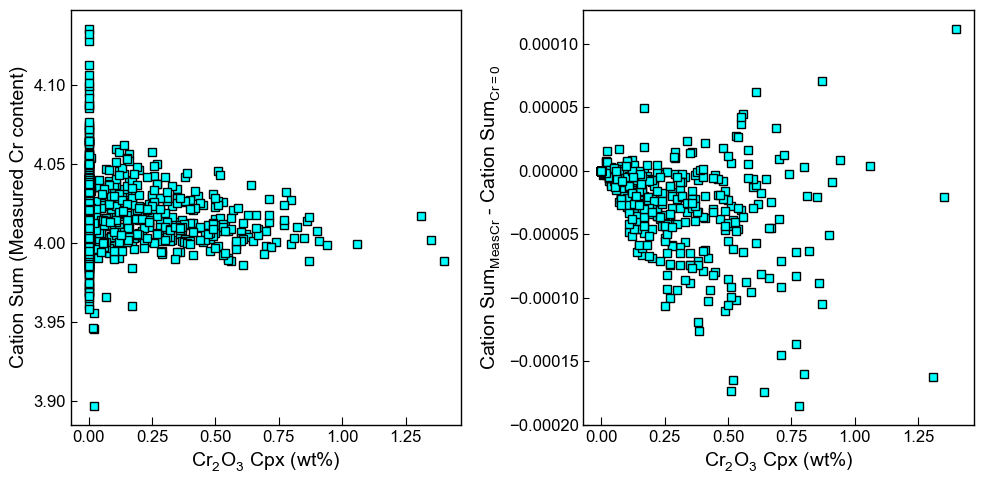

In [41]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(cat_sums_original['Cr2O3_Cpx'],
         cat_sums_original['Cation_Sum_Cpx']-cat_sums_noCr['Cation_Sum_Cpx'], 
         'sk', mfc='cyan')
#ax2.hist(Cpx_with_Cr['Cation_Sum_Cpx'], fc='cyan')
#ax2.hist(Cpx_with_noCr['Cation_Sum_Cpx'], facecolor='None', ec='k')

NoCr=np.sort(Cpx_with_noCr['Cation_Sum_Cpx'])
HasCr=np.sort(Cpx_with_Cr['Cation_Sum_Cpx'])
b=3
# ax2.step(np.concatenate([NoCr, NoCr[[-1]]]),
#          np.arange(NoCr.size+1)/NoCr.size, color='black', linewidth=b, label='NoCr')
# ax2.step(np.concatenate([HasCr, HasCr[[-1]]]),
#          np.arange(HasCr.size+1)/HasCr.size, color='orange', linewidth=b, label='HasCr')
# ax2.legend()
# ax2.plot([3.98, 3.98], [0, 1], '-r')
# ax2.plot([4.02, 4.02], [0, 1], '-r')
ax2.plot(cat_sums_original['Cr2O3_Cpx'],
         cat_sums_original['Cation_Sum_Cpx'], 
         'sk', mfc='cyan')
ax1.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax2.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax1.set_ylabel('Cation Sum$_{Meas Cr}$ - Cation Sum$_{Cr=0}$')
ax2.set_ylabel('Cation Sum (Measured Cr content)')
fig.tight_layout()
fig.savefig('Cr_cation_sums.png', dpi=200)

## Lets show this with a foreloop - obviously complex

In [42]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    linCr=np.linspace(0, 1, 10)
    example_cpx1=myCpxs1.iloc[0:10]
    example_cpx2=myCpxs1.iloc[0:10]
    example_cpx1_cs=np.empty([10, len(linCr)], dtype=float)
    example_cpx2_cs=np.empty([10, len(linCr)], dtype=float)
    for i in range(0, len(linCr)):
        example_cpx1['Cr2O3_Cpx']=linCr[i]
        example_cpx2['Na2O_Cpx']=linCr[i]
        example_cpx1_cs[:, i]=pt.calculate_clinopyroxene_components(cpx_comps=example_cpx1).Cation_Sum_Cpx
        example_cpx2_cs[:, i]=pt.calculate_clinopyroxene_components(cpx_comps=example_cpx2).Cation_Sum_Cpx
    

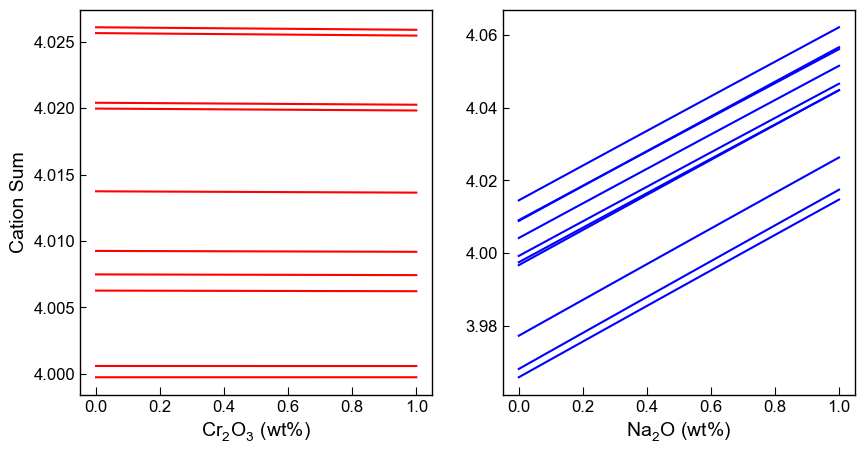

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for i in range(0, 10):
    ax1.plot(linCr, example_cpx1_cs[i, :], '-r')
    ax2.plot(linCr, example_cpx2_cs[i, :], '-b')
ax1.set_xlabel('Cr$_2$O$_3$ (wt%)')
ax2.set_xlabel('Na$_2$O (wt%)')
ax1.set_ylabel('Cation Sum')
ax1.ticklabel_format(useOffset=False)
fig.savefig('Cation_Sum_pertubation.png', dpi=200)

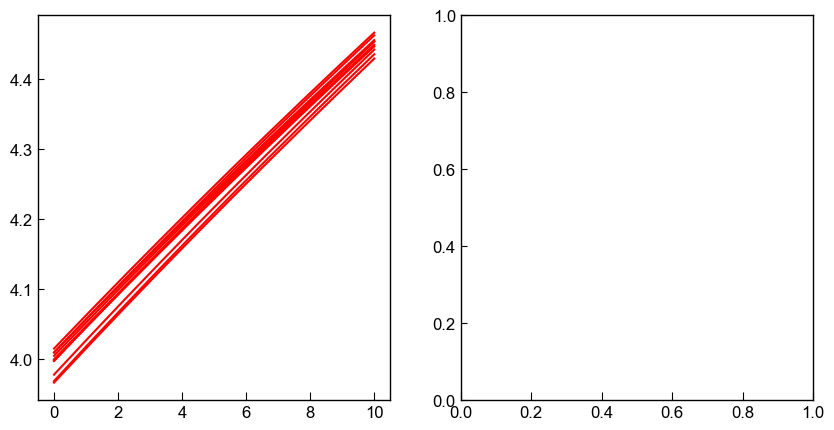

In [44]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    linCr=np.linspace(0, 10, 10)
    example_cpx1=myCpxs1.iloc[0:10]
    example_cpx1_cs=np.empty([10, len(linCr)], dtype=float)
    for i in range(0, len(linCr)):
        example_cpx1['Na2O_Cpx']=linCr[i]
        example_cpx1_cs[:, i]=pt.calculate_clinopyroxene_components(cpx_comps=example_cpx1).Cation_Sum_Cpx
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for i in range(0, 10):
    ax1.plot(linCr, example_cpx1_cs[i, :], '-r')
ax1.ticklabel_format(useOffset=False)    

## Figure for text - Cpx-only

In [45]:
#cpx_components=pt.calculate_clinopyroxene_components(cpx_comps=ExpY1_noise1)
len(myCpxs1['Cr2O3_Cpx'].loc[sam])                         

490

In [52]:
np.min(Cr_cpx_comp_Wang21_Meas-Cr_cpx_comp_Wang21_NoCr)

-2.8222194082283885

In [56]:
np.min(Cr_cpx_comp_Put2008_Meas-Cr_cpx_comp_Put2008_NoCr)

-1.9891946881071725

In [57]:
np.min(Cr_cpx_comp_Put2008_T_Meas-Cr_cpx_comp_Put2008_T_NoCr)

-15.531381177808726

In [55]:
np.min(Cr_cpx_comp_Wang21_T_Meas-Cr_cpx_comp_Wang21_T_NoCr)

-34.986452899739334

In [59]:
np.max(Cr_cpx_comp_Pet_Meas-Cr_cpx_comp_Pet_NoCr)

4.631028888888916

In [63]:
np.min(Cr_cpx_comp_Pet_T_Meas-Cr_cpx_comp_Pet_T_NoCr)

-92.5533333333342

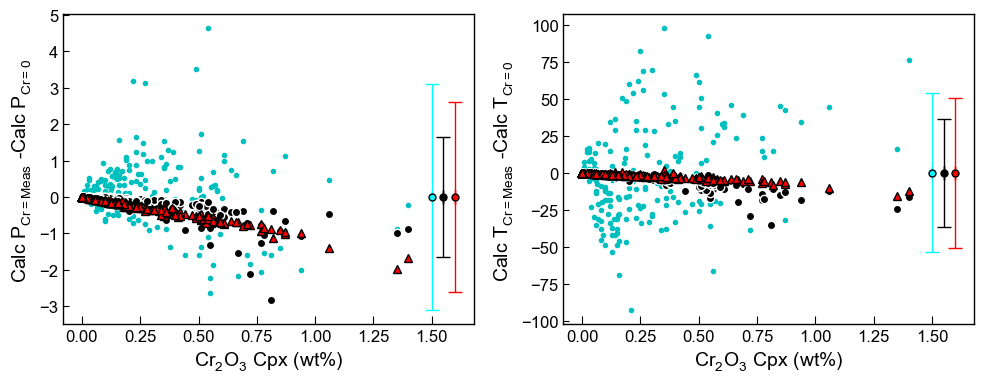

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Pet_Meas-Cr_cpx_comp_Pet_NoCr, '.c')

ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Wang21_Meas-Cr_cpx_comp_Wang21_NoCr, 'ok', mec='w')
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Put2008_Meas-Cr_cpx_comp_Put2008_NoCr, '^k', mfc='r')

ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Pet_T_Meas-Cr_cpx_comp_Pet_T_NoCr, '.c')

ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Wang21_T_Meas-Cr_cpx_comp_Wang21_T_NoCr,  'ok', mec='w')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Put2008_T_Meas-Cr_cpx_comp_Put2008_T_NoCr, '^k', mfc='r')

## Adding error bars based on Ery's suggestion
ax1.errorbar(1.5, 0, xerr=0, yerr=3.1, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax1.errorbar(1.55, 0, xerr=0, yerr=1.66, fmt='o', ecolor='black', 
             elinewidth=1, mfc='black',  ms=5,
             mec='k', capsize=5, 
             label='Wang')
ax1.errorbar(1.6, 0, xerr=0, yerr=2.6, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008')


ax2.errorbar(1.5, 0, xerr=0, yerr=53.8, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax2.errorbar(1.55, 0, xerr=0, yerr=36.6, fmt='o', ecolor='black', 
             elinewidth=1, mfc='black',  ms=5,
             mec='k', capsize=5, 
             label='Wang')
ax2.errorbar(1.6, 0, xerr=0, yerr=51, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008')

ax1.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax2.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax1.set_ylabel('Calc P$_{Cr=Meas}$ -Calc P$_{Cr=0}$ ')
ax2.set_ylabel('Calc T$_{Cr=Meas}$ -Calc T$_{Cr=0}$ ')
plt.tight_layout()
fig.savefig('Cr_Cpx-only_points.png', dpi=200)

## Figure for text - Cpx-Liq

## Figure for Text - Cpx-Liq thermobarometry

In [65]:
np.max(Cr_Pet_T_Meas-Cr_Pet_T_NoCr)

22.950909090909363

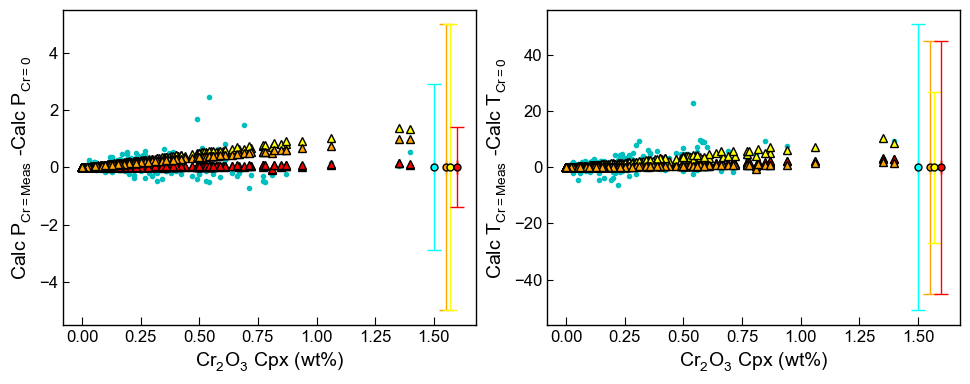

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Pet_P_Meas-Cr_Pet_P_NoCr, '.c')

ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_31_T33_P_Meas-Cr_31_T33_P_NoCr, '^k')

ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Neave_T33_P_Meas-Cr_Neave_T33_P_NoCr, '^k', mfc='r')
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_T33_P_Meas-Cr_32c_T33_P_NoCr, '^k', mfc='yellow')
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_1996_P_Meas-Cr_32c_1996_P_NoCr, '^k', mfc='orange')

#Temp
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Pet_T_Meas-Cr_Pet_T_NoCr, '.c')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_31_T33_T_Meas-Cr_31_T33_T_NoCr, '^k')
#ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_30_T33_P_Meas-Cr_30_T33_P_NoCr, '^c')

ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Neave_T33_T_Meas-Cr_Neave_T33_T_NoCr, '^k', mfc='r')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_T33_T_Meas-Cr_32c_T33_T_NoCr, '^k', mfc='yellow')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_1996_T_Meas-Cr_32c_1996_T_NoCr, '^k', mfc='orange')
ax1.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax2.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax1.set_ylabel('Calc P$_{Cr=Meas}$ -Calc P$_{Cr=0}$ ')
ax2.set_ylabel('Calc T$_{Cr=Meas}$ -Calc T$_{Cr=0}$ ')
fig.tight_layout()

## Adding error bars based on Ery's suggestion
ax1.errorbar(1.5, 0, xerr=0, yerr=2.9, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax1.errorbar(1.55, 0, xerr=0, yerr=5, fmt='o', ecolor='orange', 
             elinewidth=1, mfc='orange',  ms=5,
             mec='k', capsize=5, 
             label='P2008 1997 T1-eq32c')
ax1.errorbar(1.57, 0, xerr=0, yerr=5, fmt='o', ecolor='yellow', 
             elinewidth=1, mfc='yellow',  ms=5,
             mec='k', capsize=5, 
             label='P2008 1997 T1-eq32c')
ax1.errorbar(1.6, 0, xerr=0, yerr=1.4, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008 eq33-NP17')


ax2.errorbar(1.5, 0, xerr=0, yerr=51, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax2.errorbar(1.55, 0, xerr=0, yerr=45, fmt='o', ecolor='orange', 
             elinewidth=1, mfc='orange',  ms=5,
             mec='k', capsize=5, 
             label='eq33-eq32c')
ax2.errorbar(1.57, 0, xerr=0, yerr=27, fmt='o', ecolor='yellow', 
             elinewidth=1, mfc='yellow',  ms=5,
             mec='k', capsize=5, 
             label='P2008 1996 T1-eq32c')
ax2.errorbar(1.6, 0, xerr=0, yerr=45, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008 eq33-NP')

fig.savefig('Cpx-Liq-Cr-variable-points.png', dpi=200)